# Assignment 2a
## Frova Davide
### Università della Svizzera italiana
### Probability and Statistics SA 2023-2024

# Assignment's Theoretical Section

## Random Variables + discrete probability

We consider the following pseudo-code:

Set the parameters: n = 1000 (sample size) and p = 0.001 (probability
of success).

- Generate 5000 uniform random numbers u between 0 and 1.
- For each random number u generated, find the corresponding value x value via inverse sampling using a binomial cdf.
- Plot a histogram of the generated x values.
- Overlay the true probability mass functions for both the Binomial and Poisson distributions on the histogram.

What do we expect from the plot? And why?


### Solution

With the given parameters, of n = 1000 and p = 0.001, we expect to have a heavily skewed plot towards 0, as the probability of success (p) is very low.

Most of the data should be clustered around 0, with only a few instances of higher numbers of successes.

In the case of the Poisson distribution, when n is large and p is small, the poisson distribution (with λ = np) is a good approximation of the binomial distribution.

Like the binomial distribution, the Poisson distribution is skewed towards lower values, having a peak at λ = np, which in this case is 1.

So we expect the probability mass function (PMF) of the Poisson distribution to be very similar to the PMF of the binomial distribution.

We can check this by plotting the PMF of the binomial distribution with the same parameters, and the PMF of the Poisson distribution with λ = np = 1.


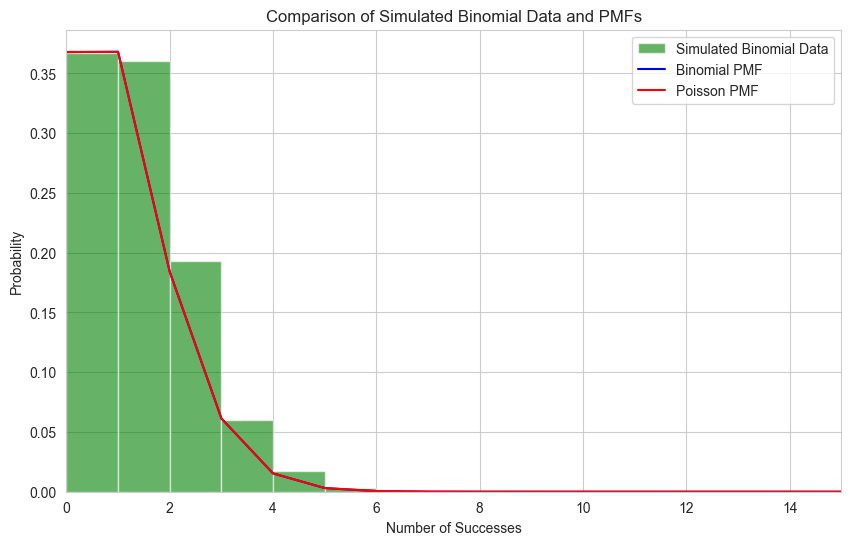

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Parameters
n = 1000  # number of trials
p = 0.001  # probability of success
lambda_ = n * p  # for Poisson distribution

# Generate random numbers for Binomial distribution using inverse transform sampling
binom_samples = np.random.binomial(n, p, 5000)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(binom_samples, bins=range(min(binom_samples), max(binom_samples) + 1), density=True, alpha=0.6, color='g', label='Simulated Binomial Data')

# Overlaying Binomial and Poisson PMFs
binom_pmf = [binom.pmf(k, n, p) for k in range(n+1)]
poisson_pmf = [poisson.pmf(k, lambda_) for k in range(n+1)]
plt.plot(binom_pmf, label='Binomial PMF', color='blue')
plt.plot(poisson_pmf, label='Poisson PMF', color='red')

plt.title('Comparison of Simulated Binomial Data and PMFs')
plt.xlim(0, 15)  # limiting x-axis for better visualization
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()


## Conditional probability + Bayes theorem

### Basics of Sentiment Analysis

The sentiment random variable may assume

S = -1 if 0 <= u < 0.4 (negative sentiment)

S = +1 if 0.4 <= u < 1 (positive sentiment)

The word random variable may assume discrete values w representing the integer position of the word in the list.

If a sentence is composed by n words, we observe n realizations of the random variable W

We aim to determine the following probabilities:

$$
P(S = 1 | W1 = w1, ... , Wn = wn)
$$
$$
P(S = -1 | W1 = w1, ... , Wn = wn)
$$

for 4 User Revies of Oppenheimer (2023):

- Horribly boring film with no action, only people talking and talking about really uninteresting things.
- There’s a terrible soundtrack of melodramatic music to make sure you know how you’re supposed to feel, frequent random booming and rumbling to make your liver quiver, and screen-filling explosions that come out of nowhere and seem designed only to startle sort of a science equivalent of jump scares.
- Half of this movie is something related with quantum physic and the rest all about law and politic. However if you aren’t into those things, you can still understand and enjoy the movies.
- Other actors performances were amazing and it’s clear that a lot of effort, passion and planning went into this movie.


### Solution

Given a sentence $S$ composed of words $W_1 = w_1, ..., W_n = w_n$, the posterior probability of the sentence having a positive sentiment $P(S=+1)$ is calculated using Bayes' theorem:

$$
P(S=+1 | W_1 = w_1, ..., W_n = w_n) = \frac{P(W_1 = w_1, ..., W_n = w_n | S=+1) \cdot P(S=+1)}{P(W_1 = w_1, ..., W_n = w_n)}
$$

Similarly, the posterior probability of the sentence having a negative sentiment $P(S=-1)$ is:

$$
P(S=-1 | W_1 = w_1, ..., W_n = w_n) = \frac{P(W_1 = w_1, ..., W_n = w_n | S=-1) \cdot P(S=-1)}{P(W_1 = w_1, ..., W_n = w_n)}
$$

Assuming words are conditionally independent given the sentiment, the above formulas can be expanded to:

$$
P(S=+1 | W_1 = w_1, ..., W_n = w_n) = \frac{\prod_{i=1}^{n}P(W_i = w_i | S=+1) \cdot P(S=+1)}{P(W_1 = w_1, ..., W_n = w_n)}
$$

$$
P(S=-1 | W_1 = w_1, ..., W_n = w_n) = \frac{\prod_{i=1}^{n}P(W_i = w_i | S=-1) \cdot P(S=-1)}{P(W_1 = w_1, ..., W_n = w_n)}
$$

Where:

- $P(S=+1)$ and $P(S=-1)$ are the prior probabilities of a sentence being positive or negative.
- $P(W_i = w_i | S=+1)$ and $P(W_i = w_i | S=-1)$ are the likelihoods of observing word $W_i = w_i$ given a positive or negative sentiment.
- $P(W_1 = w_1, ..., W_n = w_n)$ is the evidence or marginal likelihood of observing the words $W_1 = w_1, ..., W_n = w_n$.


We can see an implementation of the above formulas in the following code.

In practice, when calculating posterior probabilities for classification purposes, the denominator $P(W_1 = w_1, ..., W_n = w_n)$ can be ignored as it remains constant for both positive and negative sentiments.

The relative probabilities can then be normalized so that they sum to 1.

In [23]:
import string

# Sentiment dictionary with word probabilities
word_probs = {
    "horribly": {"positive": 0.1, "negative": 0.9},
    "boring": {"positive": 0.1, "negative": 0.9},
    "film": {"positive": 0.6, "negative": 0.4},
    "action": {"positive": 0.7, "negative": 0.3},
    "people": {"positive": 0.6, "negative": 0.4},
    "talking": {"positive": 0.2, "negative": 0.8},
    "terrible": {"positive": 0.2, "negative": 0.8},
    "soundtrack": {"positive": 0.8, "negative": 0.2},
    "melodramatic": {"positive": 0.2, "negative": 0.8},
    "music": {"positive": 0.5, "negative": 0.5},
    "feel": {"positive": 0.8, "negative": 0.2},
    "frequent": {"positive": 0.6, "negative": 0.4},
    "random": {"positive": 0.7, "negative": 0.3},
    "booming": {"positive": 0.3, "negative": 0.7},
    "rumbling": {"positive": 0.3, "negative": 0.7},
    "liver": {"positive": 0.1, "negative": 0.9},
    "quiver": {"positive": 0.1, "negative": 0.9},
    "screen-filling": {"positive": 0.2, "negative": 0.8},
    "explosions": {"positive": 0.3, "negative": 0.7},
    "science": {"positive": 0.6, "negative": 0.4},
    "equivalent": {"positive": 0.6, "negative": 0.4},
    "jump": {"positive": 0.6, "negative": 0.4},
    "scares": {"positive": 0.3, "negative": 0.7},
    "half": {"positive": 0.5, "negative": 0.5},
    "related": {"positive": 0.7, "negative": 0.3},
    "quantum": {"positive": 0.8, "negative": 0.2},
    "physic": {"positive": 0.8, "negative": 0.2},
    "rest": {"positive": 0.5, "negative": 0.5},
    "law": {"positive": 0.2, "negative": 0.8},
    "politic": {"positive": 0.2, "negative": 0.8},
    "enjoy": {"positive": 0.8, "negative": 0.2},
    "actors": {"positive": 0.8, "negative": 0.2},
    "performances": {"positive": 0.8, "negative": 0.2},
    "amazing": {"positive": 0.9, "negative": 0.1},
    "effort": {"positive": 0.8, "negative": 0.2},
    "passion": {"positive": 0.9, "negative": 0.1},
    "planning": {"positive": 0.8, "negative": 0.2}
}


# Prior probabilities for positive and negative sentiments
prior_positive = 0.5  # Assuming equal priors if not specified
prior_negative = 0.5

# Function to apply Bayes' Theorem and calculate the posterior probability of sentiment


def calculate_posterior(sentence, word_probs, prior_positive, prior_negative):
    # Remove punctuation and tokenize the sentence into words
    translator = str.maketrans('', '', string.punctuation)
    cleaned_sentence = sentence.translate(translator)
    words = cleaned_sentence.lower().split()  # Tokenizing the sentence into words

    # Initialize probabilities with prior values
    prob_positive = prior_positive
    prob_negative = prior_negative

    # Update probabilities for each word in the sentence
    for word in words:
        if word in word_probs:
            prob_positive *= word_probs[word]["positive"]
            prob_negative *= word_probs[word]["negative"]

    # Normalize probabilities to sum to 1
    total_prob = prob_positive + prob_negative
    prob_positive /= total_prob
    prob_negative /= total_prob

    return prob_positive, prob_negative


# Sentences
sentences = [
    "Horribly boring film with no action, only people talking and talking about really uninteresting things.",
    "There's a terrible soundtrack of melodramatic music to make sure you know how you're supposed to feel, frequent random booming and rumbling to make your liver quiver, and screen-filling explosions that come out of nowhere and seem designed only to startle sort of a science equivalent of jump scares.",
    "Half of this movie is something related with quantum physic and the rest all about law and politic. However if you aren't into those things, you can still understand and enjoy the movies.",
    "Other actors performances were amazing and it's clear that a lot of effort, passion and planning went into this movie."
]


# Calculate posterior probability for each sentence
for sentence in sentences:
    posterior_positive, posterior_negative = calculate_posterior(
        sentence, word_probs, prior_positive, prior_negative)
    print("Positive probability: {} \t Negative probability: {}".format(
        posterior_positive, '{:.20f}'.format(posterior_negative)))

Positive probability: 0.00403458213256484 	 Negative probability: 0.99596541786743508773
Positive probability: 0.004895738893925656 	 Negative probability: 0.99510426110607430594
Positive probability: 0.903225806451613 	 Negative probability: 0.09677419354838710797
Positive probability: 0.9999517770169262 	 Negative probability: 0.00004822298307373294


## Continuous distribution + Exponential

Let X be a random variable following an Exponential distribution with rate parameter λ > 0, representing the time until the occurrence of an event.

Prove the memoryless property of the exponential distribution by demonstrating that, for any non-negative constants a and b, the following holds:

$$
P(X > a + b | X > a) = P(X > b)
$$


### Solution

The memoryless property of the exponential distribution states that the probability of an event occurring after time $a + b$ given that it has not occurred after time $a$ is equal to the probability of the event occurring after time $b$.

$$
P(X > a + b | X > a) = P(X > b)
$$

The proof of this property is as follows

By the definition of conditional probability:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

Where in our case $A = X > a + b$ and $B = X > a$.

We can then rewrite the above equation as:

$$
P(X > a + b | X > a) = \frac{P(X > a + b \cap X > a)}{P(X > a)}
$$

We can simplify the numerator as follows:

$$
P(X > a + b \cap X > a) = P(X > a + b)
$$

This is because since $X > a + b$ implies $X > a$, the intersection of the two events is the same as the event $X > a + b$.

So we can rewrite the above equation as:

$$
P(X > a + b | X > a) = \frac{P(X > a + b)}{P(X > a)}
$$

Given that the cumulative distribution function (CDF) of the exponential distribution is:

$$
F(x) = P(X > x) = e^{-\lambda x}
$$

We can rewrite the above equation as:

$$
P(X > a + b | X > a) = \frac{e^{-\lambda (a + b)}}{e^{-\lambda a}}
$$

We can simplify the above equation as follows:

$$
P(X > a + b | X > a) = \frac{e^{-\lambda a} \cdot e^{-\lambda b}}{e^{-\lambda a}}
$$

$$
P(X > a + b | X > a) = e^{-\lambda b}
$$

$$
P(X > a + b | X > a) = P(X > b)
$$

Which is what we wanted to prove.

### Intepretation

This result means that the exponential distribution is memoryless, this means that the probability of an event occurring after a certain amount of time does not depend on how much time has already passed.

This is a good approximation for many real world processes.

For example in the case of a next customer arriving at a store, the probability of a customer arriving after 5 minutes given that no customer has arrived after 3 minutes is the same as the probability of a customer arriving after 5 minutes given that no customer has arrived after 1 minute.

The future behavior of the process does not depend on the past.

## Linear regression + estimation

The aim of a study is to find out the effect of exposure to sunlight on the increase of freckles per exposure hour.

A study of 100 people find that the effect is $\hat\beta = 0.3$

Given this:

- Interpret the coefficient
- Then a bootstrap is performed. Explain in detail:
  - How the bootstrap works
  - The purpose of the bootstrap

### Solution

The coefficient $\hat\beta = 0.3$ means that on average, for each additional hour of exposure to sunlight, the number of freckles increases by 0.3.

The bootstrap is a resampling method used to estimate the sampling distribution of a statistic.

The bootstrap works by repeatedly sampling from the original sample with replacement, and calculating the statistic of interest on each resampled dataset.

The purpose of the bootstrap is to estimate the sampling distribution of a statistic when the true sampling distribution is unknown or difficult to calculate.

In this case, the bootstrap can be used to estimate the sampling distribution of the coefficient $\hat\beta$.

So, our assumptions and theorems will not depend on just one sample, which could be an outlier or not representative of the population, but on many samples.

## Logistic regression + prediction

Explore the role of logit and logistic function in the logistic regression.

Find one function as the inverse of the other.

How do you evaluate the accuracy?

Would you evaluate it in your training or test data? Explain why.

### Solution

The logstic function is used in logistic regression to map the output of the linear regression to a probability between 0 and 1.

This probability is the probability of the observation belonging to the positive class.

For example in the case of a binary classification problem, like a patient and a desease, the positive class would be the patient having the desease.

The logit function is the inverse of the logistic function, and is used to map the probability back to the linear regression output.

The logit function is defined as:

$$
logit(p) = log(\frac{p}{1-p})
$$

The logistic function is defined as:

$$
logistic(x) = \frac{1}{1 + e^{-x}}
$$

The logistic function is the inverse of the logit function, and the logit function is the inverse of the logistic function.

You can see this by calculating the composition of the two functions:

$$
logit(logistic(x)) = log(\frac{\frac{1}{1 + e^{-x}}}{1 - \frac{1}{1 + e^{-x}}})
$$

$$
logit(logistic(x)) = log(\frac{\frac{1}{1 + e^{-x}}}{\frac{e^{-x}}{1 + e^{-x}}})
$$

$$
logit(logistic(x)) = log(\frac{1}{e^{-x}})
$$

$$
logit(logistic(x)) = log(e^{x})
$$

$$
logit(logistic(x)) = x
$$

The accuracy of a logistic regression model can be evaluated using the accuracy score, which is the number of correct predictions divided by the total number of predictions.

$$
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
$$

The accuracy score can be calculated on both the training and test data.

The accuracy score on the training data is used to evaluate how well the model fits the training data.

The accuracy score on the test data is used to evaluate how well the model generalizes to unseen data.


## Hypothesis testing

In a recent music festival, organizers measured the duration of unplanned pauses during 100 performances due to suspected technical problems.

The mean duration was found to be 1.7 seconds.

- State the null and the alternative hypothesis.
- The subsequent analysis yielded a p-value of 0.0001. Did the organizers guess correctly?


### Solution

The null hypothesis is that the mean duration of unplanned pauses is 1.7 seconds.

$$
H_0: \mu = 1.7
$$

The alternative hypothesis is that the mean duration of unplanned pauses is not 1.7 seconds.

This means that the mean duration of unplanned pauses is either greater than or less than 1.7 seconds.

$$
H_1: \mu \neq 1.7
$$

The p-value is the probability of observing a test statistic at least as extreme as the one observed, given that the null hypothesis is true.

In this case, the p-value is 0.0001, which means that the probability of observing a mean duration of unplanned pauses of exactly 1.7 seconds is 0.0001 or 0.01%.

Given that the p-value is lower than the standard significance level of 0.05 or 5%, we can reject the null hypothesis.

This means that the organizers did not guess correctly, and the mean duration of unplanned pauses is not 1.7 seconds.

It is either greater than or less than 1.7 seconds.

# Assignment's Practical Section

## Research problem

We performed a clinical trial with 768 women, and collected these variables:

- Number of pregnancies
- Glucose concentration
- Diastolic blood pressure
- Triceps skin fold thickness
- Insulin concentration
- BMI (Body Mass Index)
- Age of the patient
- Whether the patient has diabetes or not

With these values, our goal is to answer the following question:

*What are the key factors that contribute to the development of diabetes in women, and how do they affect the probability of developing the disease?*

Knowing how these factors affect the probability of developing the disease is essential for risk assessment and early diagnosis. This knowledge can help in designing a tool that not only identifies the presence of diabetes but also assesses the risk levels based on various health indicators.


## Exploratory analysis

In this section we will perform an exploratory analysis of the data, in order to understand the distribution of the variables and their relationship with the target variable.

This analysis will be performed visually using different types of plots, this will enable us to understand the data and to identify possible outliers, trends and correlations in a more intuitive way.

In [24]:
# We inlcude the needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read in the data
data = pd.read_csv('diabetes.csv')

### Histograms of the distribution of the variables

As our first step, we can plot an histogram for each variable in order to understand the distribution of the data.

This will enable us to identify possible outliers or missing values and to identify the type of distribution of each variable.

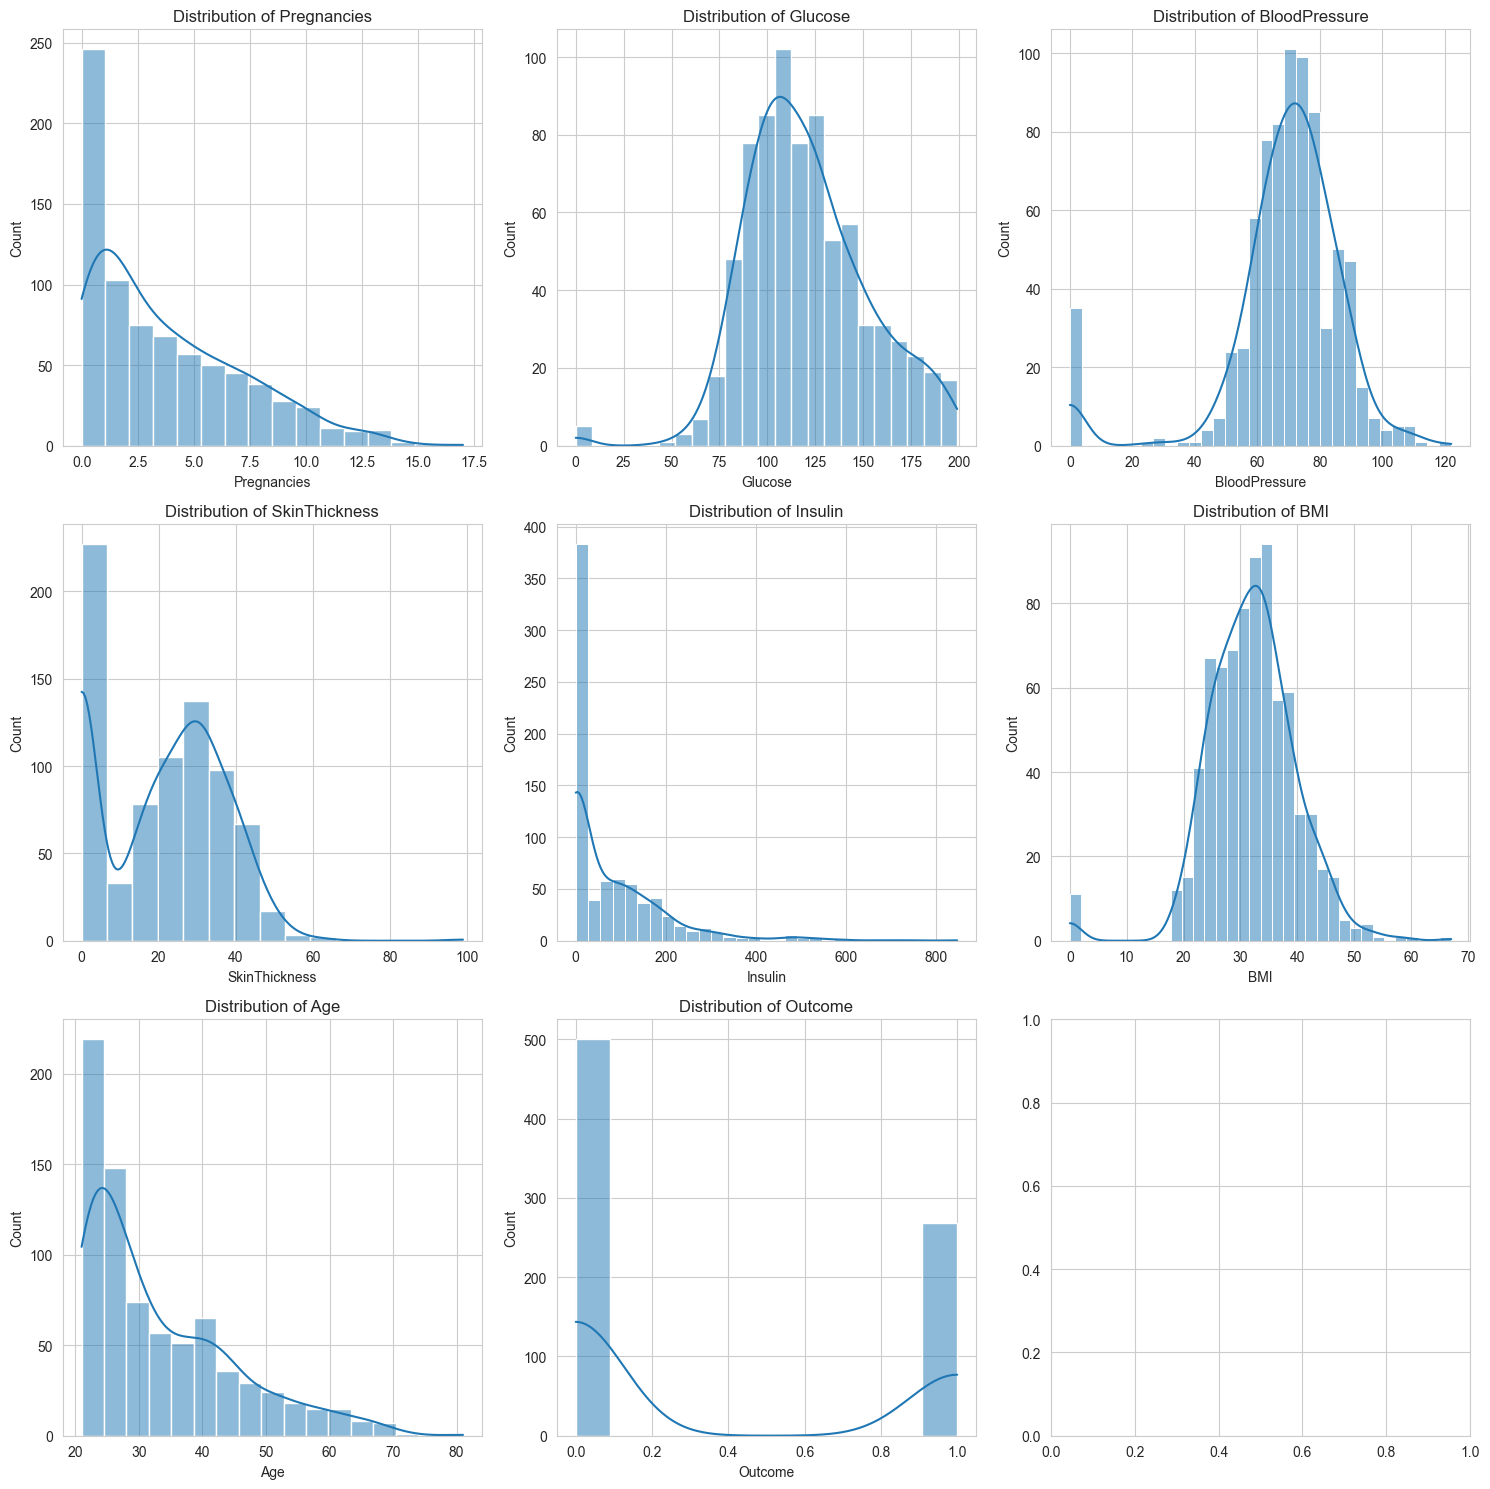

In [26]:
# First we set the style of the plots
sns.set_style("whitegrid")

# Now we create different subplots to show the data
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Now we create a plot for each of the columns
columns = data.columns

for i, col in enumerate(columns):
    ax = axes[int(i // 3), i % 3]  # Position of the subplot
    sns.histplot(data[columns[i]], kde=True, ax=ax)  # Create the plot
    ax.set_title(f'Distribution of {col}')  # Set the title
    ax.set_xlabel(col)  # Set the x label
    ax.set_ylabel('Count')  # Set the y label

plt.tight_layout()  # This makes sure the plots don't overlap
plt.show()  # Displays the plot

### Analysis of the resulting plots

From this sequence of plots we are already able to perform some meaningful observations.

Let's analyze each plot individually:

#### Number of pregnancies

The first plot shows the distribution of the number of pregnancies of the patients.

We can see a really high number of patients with 0 pregnancies, and a decreasing number of patients as the number of pregnancies increases.

The really high count of patients with 0 pregnancies is ambiguous, as it could be due to a high number of young patients or due to the use of 0 as a placeholder for missing values.

We will see later in the analysis of the Age variable if the first hypothesis is true.

Overall we can see that the distribution is skewed to the right, with a long tail of patients with a high number of pregnancies.

This doesn't seem to be a realistic distribution, as it is unlikely that a patient has more than 5 pregnancies.

These values could be outliers, or they could be due to a wrong data collection.

The high values of the number of pregnancies could be due to the origin of the data. In some countries, the number of pregnancies is higher than in others, and this could be the reason for the high number of patients with a high number of pregnancies.

By not having any information about the origin of the data, and the relative population, we can't say if this is a realistic distribution or not.

Some reference data can be found here: [link](https://en.wikipedia.org/wiki/Total_fertility_rate)

#### Glucose concentration

The second plot shows the distribution of the glucose concentration of the patients.

The distribution follows a normal distribution, with a mean between 90 and 125 mg/dl.

This is a realistic distribution, as the normal range for glucose concentration is between 70 and 100 mg/dl.

By comparing the values to the ones in the World Healt Organization website, we can see that they seem to be a bit too high, as a level of glucose between 100 and 125 mg/dl is considered at risk and to be monitored.

This is probably due to the fact that a significant number of patients in our trial have diabetes, and this increases the mean of the distribution.

Here is a reference for the compared typical values: [link](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=indicator%20GPW%20indicator-,Rationale%3A,-The%20expected%20values)


There are close to no missing values, as the count of patients with 0 glucose concentration is really low.

Overall this variable seems to be a reliable indicator to be used in the analysis.

#### Diastolic blood pressure

The third plot shows the distribution of the diastolic blood pressure of the patients.

The distribution follows a normal distribution, with a mean between 60 and 80 mmHg.

There are some missing values, as there are near to 40 patients with 0 diastolic blood pressure.
By the fact that a diastolic blood pressure of 0 mmHg is not possible, we can assume that these values are missing values.

The percentage of missing values with respect to the total population of the trial is 5.21%, so we can consider this variable reliable.

#### Triceps skin fold thickness

The fourth plot shows the distribution of the triceps skin fold thickness of the patients.

The distribution follows a normal distribution, with a mean between 20 and 40 mm.

There is a high rate of missing values, as there are more than 200 patients with 0 triceps skin fold thickness.
By the fact that a thickness of 0 mm is not possible, we can assume that these values are missing values.

This is a really high percentage of missing values, as it is approximately 28.5% of the total population of the trial.

This makes the variable unreliable, as it is not possible to impute the missing values without introducing a bias in the analysis.

#### Insulin concentration

The fifth plot shows the distribution of the insulin concentration of the patients.

The distribution follows a normal distribution, with a mean around 100 μU/ml.

There is a high rate of missing values, as there are almost 400 patients with 0 insulin concentration.
By the fact that a concentration of 0 μU/ml is not possible, we can assume that these values are missing values.

This is a really high percentage of missing values, as it is approximately 50% of the total population of the trial.
This could be due to the fact that the insulin concentration is not easily measurable, as it requires a blood test.

This makes the variable unreliable as it is not possible to impute the missing values without introducing a bias in the analysis.

#### BMI (Body Mass Index)

The sixth plot shows the distribution of the BMI (Body Mass Index) of the patients.

The distribution follows a normal distribution, with a mean between 25 and 35 kg/m^2.

There are close to no missing values, as the count of patients with 0 BMI is really low.

Overall this variable seems to be a reliable indicator to be used in the analysis, with no evident number of outliers.

#### Age of the patient

The seventh plot shows the distribution of the age of the patients.

The distribution is skewed to the right, with a mean between 20 and 40 years.

There are no missing values, as the count of patients with 0 age is 0.

There is a really high count of patients with an age between 20 and 25 years, this information is consistent with the high count of patients with 0 pregnancies.

This means that the high count of patients with 0 pregnancies is due to a high number of young subjects, and not to the use of 0 as a placeholder for missing values, as the number of subjects in the previously specified range matches with the number of patients with 0 pregnancies.
This makes the previous variable more reliable, even though it still has a high number of outliers.

Overall the age variable seems to be a reliable indicator to be used in the analysis.

#### Whether the patient has diabetes or not

The eighth plot shows the distribution of the target variable, which is whether the patient has diabetes or not.

It is a binary variable, with 0 indicating that the patient does not have diabetes, and 1 indicating that the patient has diabetes.

It appears that the number of patients with diabetes is much lower than the number of patients without diabetes.

The percentage of patients with diabetes is 34.9%, while the percentage of patients without diabetes is 65.1%.

### Heatmap of the correlation matrix

In order to understand the relationship between the variables, we can plot a heatmap of the correlation matrix.

This will enable us to understand which variables are correlated, and which variables are not.

The highly correlated variables with respect to the target variable (diabetes or not) will probably be the most important variables in the analysis, and could result in being the key variables that we are looking to identify.

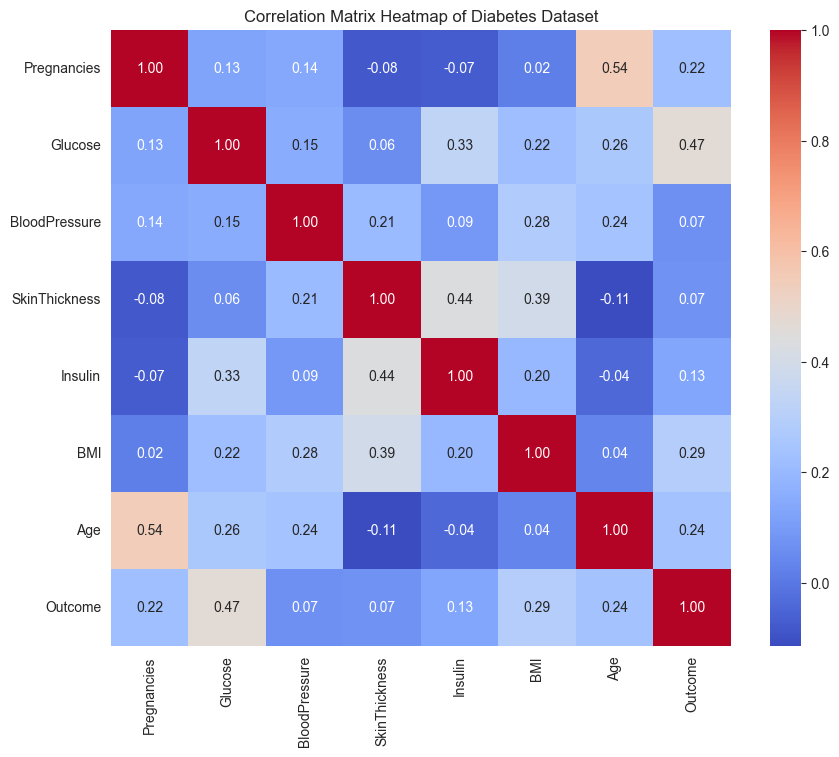

In [27]:
# First we create a correlation matrix
corr = data.corr()

# We can now create a Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap of Diabetes Dataset')
plt.show()

### Interpretation of correlation coefficients

#### General interpretation

A higher absolute value of the correlation coefficient indicates a stronger relationship between the two variables.

The sign of the correlation coefficient indicates the direction of the relationship (positive or negative).

If the sign is positive, the two variables are positively correlated, this means that when one variable increases, the other variable increases as well.

If the sign is negative, the two variables are negatively correlated, this means that when one variable increases, the other variable decreases.

#### Specific interpretation

When we refer to the target variable / outcome, we are referring to the patients having diabetes or not.

When a correlation coefficient is positive, it means that the variable is positively correlated with the target variable, this means that when the variable increases, the probability of having diabetes increases as well.

We can first analyze the correlation coefficients between the target variable (outcome) and the other variables.

The correlatin coefficients are the following:

- Number of pregnancies: 0.22
- Glucose concentration: 0.47
- Diastolic blood pressure: 0.07
- Triceps skin fold thickness: 0.07
- Insulin concentration: 0.13
- BMI (Body Mass Index): 0.29
- Age of the patient: 0.24

We can see that we do not have any negative correlation coefficients, this means that all the variables are positively correlated with the target variable.

So, no variable decreases the probability of having diabetes.

#### Correlation coefficients

We can see that the variable with the highest positive correlation coefficient with the target variable is:

- Glucose concentration: 0.47

This is consistent with the mean of the distribution of the glucose concentration, as it is higher for our portion of patients with diabetes.

After the glucose concentration, we can see a group of variables with a correlation coefficient between 0.2 and 0.3, these variables are:

- BMI (Body Mass Index): 0.29
- Age of the patient: 0.24
- Number of pregnancies: 0.22

These variables do not have such a high correlation coefficient with respect to the glucose concentration, but they are still positively correlated with the target variable.

The other variables have a correlation coefficient between 0.05 and 0.2, these variables are:

- Insulin concentration: 0.13
- Diastolic blood pressure: 0.07
- Triceps skin fold thickness: 0.07

These variables have a lower correlation coefficient with respect to the previous ones, this means that they are less correlated with the target variable and they are less important in our analysis as they do not have a strong impact on the probability of having diabetes.

#### Secondarily correlated variables

We can also analyze the correlation coefficients between the variables, for example we have the following high correlation coefficients:

- Pregnancy and age: 0.54
- Skin fold thickness and Insulin concentration: 0.44
- Skin fold thickness and BMI: 0.39
- Glucose concentration and Insulin concentration: 0.33

These correlation coefficients are not as interesting as the ones with the target variable, but they can still be useful in our analysis.

For example they can be used to confirm the reliability of the data, as we can see that the skin fold thickness is correlated with the insulin concentration and with the BMI, this is consistent with the fact that the skin fold thickness is a measure of the amount of subcutaneous fat, and the insulin concentration and the BMI are both indicators of the amount of fat in the body.

Also we can see that the number of pregnancies is correlated with the age of the patient, this is consistent with the fact that the number of pregnancies increases with the age of the patient.

### Overall interpretation of the exploratory analysis

From the exploratory analysis, by comparing the distribution of the variables and the correlation coefficients, we can see that the most important variables in our analysis are:

- Glucose concentration
- BMI (Body Mass Index)
- Age of the patient

These variables are the ones with the highest correlation coefficient with respect to the target variable, and they are also the ones with the smallest number of missing values or outliers.

We can also see that the variables with the lowest correlation coefficient with respect to the target variable are:

- Number of pregnancies
- Diastolic blood pressure
- Triceps skin fold thickness
- Insulin concentration

They are less correlated with the target variable and less reliable due to the high number of missing values or outliers.

The number of pregnancies is still a quite correlated variable (0.22) to the outcome, but it is not as reliable as the other ones due to different reasons.

In particular the decision of not "trusting" this variable is due to the following reasons:

- The high number of possible outliers
- Unknown origin of the data
- Age distribution

As said before, the frequency of high number of pregnancies is really uncommon, and it highly depends on the origin of the data.
By not having any information about the origin of the data, we can't say if this is a realistic distribution or not.

The percentage of young patients (between 20 and 25 years) is 34.8%, this is a really high percentage, and it is consistent with the high number of patients with 0 pregnancies.

By having this low number of pregnancies in the majority of the patients, we can assume that this variable will not affect as much the probability of having diabetes as the other variables.

Thus, to keep the analysis simple and to avoid introducing a bias in the analysis, due to the unusual distribution of the number of pregnancies, we could exclude this variable from the final analysis.


## Formal analysis

In this section we will perform a formal analysis of the data.
We will perform the following steps:

- Split the data into training and test set
- Model fitting
- Coefficients analysis
- Bootstrap analysis
- Model selection and evaluation

### Split the data into training and test set

In order to perform the analysis, we first need to split the data into a training set and a test set.

We will use the training set to fit the model, and the test set to evaluate the model.

We will use a 90/10 split, this means that 90% of the data will be used for training, and 10% of the data will be used for testing.

In [28]:
def data_splitting(data, train_percentage, seed):
    """
    This function splits the data into training and testing data
    :param data: The data to split
    :param train_percentage: The percentage of the data to use for training (between 0 and 1)
    :param seed: The seed to use for the randomization
    :return: The training and testing data (in that order)
    """

    # We first shuffle the data
    shuffled_data = data.sample(frac=1, random_state=seed)

    # We now split the data into training and testing data

    # Index for splitting
    split_index = int(train_percentage * len(shuffled_data))

    train_data = shuffled_data[:split_index]

    test_data = shuffled_data[split_index:]

    return train_data, test_data


my_student_id = 22981047
train_data, test_data = data_splitting(data, 0.9, my_student_id)

print(f'The length of the training data is {len(train_data)}')
print("")
print(train_data.head())
print("")
print(f'The length of the testing data is {len(test_data)}')
print("")
print(test_data.head())

The length of the training data is 691

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
29             5      117             92              0        0  34.1   38   
558           11      103             68             40        0  46.2   42   
399            3      193             70             31        0  34.9   25   
378            4      156             75              0        0  48.3   32   
75             1        0             48             20        0  24.7   22   

     Outcome  
29         0  
558        0  
399        1  
378        1  
75         0  

The length of the testing data is 77

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
523            9      130             70              0        0  34.2   45   
686            3      130             64              0        0  23.1   22   
50             1      103             80             11       82  19.4   22   
549            4      189            110

### Model fitting

We will fit a logistic regression model on the training set, using initially all the variables.

In [29]:
def logistic_function(z):
    """
    This is the logistic function, it will map any real value between 0 and 1
    :param z: The input
    :return: The probability of the input being positive
    """
    return 1 / (1 + np.exp(-z))


def custom_logistic_regression_fit(X, y, learning_rate=0.01, iterations=1000):
    """
    Custom function to fit a logistic regression model.
    It uses gradient descent to find the optimal coefficients for the model.

    Args:
    X (array): Predictor variables.
    y (array): Target variable.
    learning_rate (float): Learning rate for gradient descent. Step of each iteration of the gradient descent algorithm
    iterations (int): Number of iterations for gradient descent.

    Returns:
    coefficients (array): Coefficients of the model.
    bias (float): Bias of the model.
    """
    # Initialize bias to 0
    bias = 0

    # Setting the number of samples and variables
    n_samples, n_variables = X.shape

    # Initialize coefficients to 0
    coefficients = np.zeros(n_variables)

    # Gradient Descent
    """
     In each iteration, it calculates predictions using the current coefficients.
     This is done by computing the dot product of X and coefficients, and then passing the result to the logistic_function.
     From this we will get the probabilities of the entries being positive (having diabetes), which are values between 0 and 1.
     Then it computes the error between predictions and actual values, and adjusts the coefficients in the direction that reduces the error.
    """
    for _ in range(iterations):
        # Linear combination of predictor variables and coefficients
        linear_combination = np.dot(X, coefficients) + bias

        # Predictions using the logistic function
        predictions = logistic_function(linear_combination)

        # Estimated errors
        errors = predictions - y

        # Calculate gradients
        gradient_coefficients = (1 / n_samples) * np.dot(X.T, errors)
        gradient_bias = (1 / n_samples) * np.sum(errors)

        # Update coefficients and bias
        coefficients = coefficients - learning_rate * gradient_coefficients
        bias = bias - learning_rate * gradient_bias

    return coefficients, bias

#### Explanation of our logistic regression model

Our goal is to minimize the error of the prediction of the model.

We compute the probability with our `logistic_function(z)` function, which takes as input the linear combination of the coefficients and the variables plus the bias.

The linear combination is the sum of the product of the coefficients and the variables, which results in a Dot Product that gives us a single value.

This value is then passed to the `logistic_function(z)` function, which returns a value between 0 and 1.

This result is the probability of the input values to be classified as 1, which means that the patient has diabetes.

We can then compute the error by subtracting the true value from the predicted value, and then compute the gradient of the coefficients and of the bias.

The gradient is then used to update the coefficients and the bias, in order to minimize the error.

We repeat this process `iterations` times, in order to minimize the error as much as possible.


#### Execution of the model fitting

We can now call the `custom_logistic_regression_fit` function, which will fit the model and return the coefficients.

We can keep the 10 iterations as default, they shuld be enough to reach convergence.

We can also keep the tolerance as default, as it is already set to a good value.


In [30]:
# We first split the data into X and y
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']

# We now fit the model
coefficients, bias = custom_logistic_regression_fit(
    X_train,
    y_train,
    learning_rate=0.01,
    iterations=1000
)

And then we can print the coefficients

In [31]:
# We now print the coefficients with their corresponding labels
for i, col in enumerate(X_train.columns):
    print(f'The coefficient for {col} is {coefficients[i]}')

The coefficient for Pregnancies is 1.8377355267239637
The coefficient for Glucose is 0.34458589118792565
The coefficient for BloodPressure is -0.9817403595125829
The coefficient for SkinThickness is 0.06957120942611549
The coefficient for Insulin is -0.0016708768660876894
The coefficient for BMI is 0.14397602035385573
The coefficient for Age is 0.05527110258742418


Or we can even plot them, to compare them visually

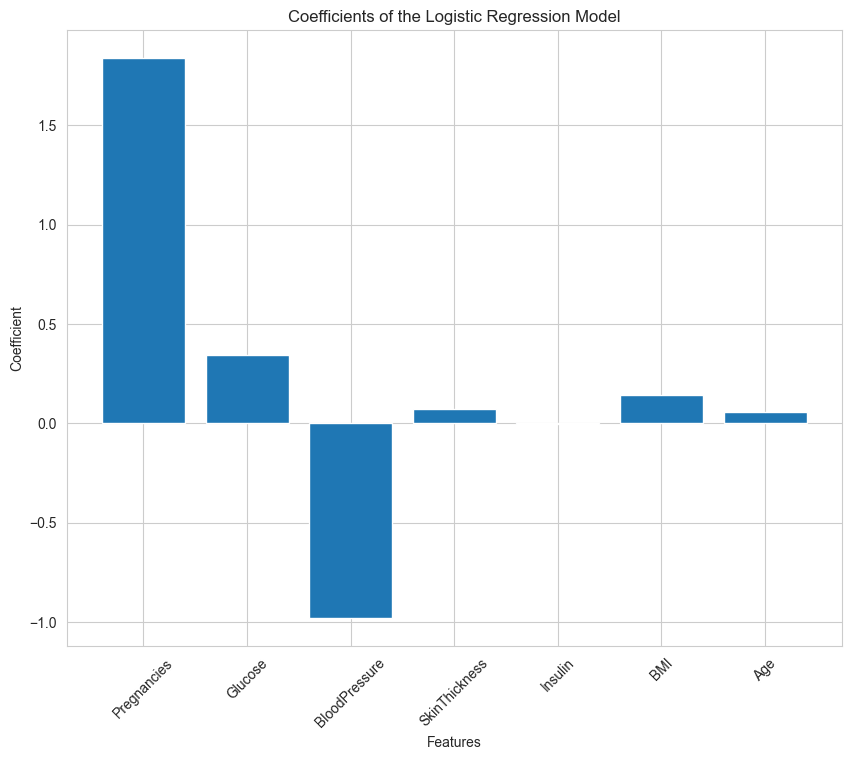

In [32]:
# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, coefficients)
plt.title('Coefficients of the Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

### Coefficients analysis

We can now analyze the coefficients of the model.

With 100 iterations and a step of 0.01, we got these coefficients:

- Pregnancies: 1.838
- Glucose: 0.345
- BloodPressure: -0.982
- SkinThickness: 0.070
- Insulin: -0.002
- BMI: 0.144
- Age: 0.055

We can see some counterintuitive results, as the diastolic blood pressure and the insulin concentration have a negative coefficient.

This means that as the diastolic blood pressure and the insulin concentration increase, the probability of having diabetes decreases. Which is not what we expected, as we saw from the exploratory analysis that these variables are positively correlated with the target variable.

This could be due to the fact that the diastolic blood pressure and the insulin concentration are correlated with other variables, and these variables are the ones that are actually affecting the probability of having diabetes.

This means that they could be indirectly correlated with the target variable, and this is why they have a negative coefficient.

We are now going to analyze in detail the coefficients of the variables `Prengnancies` and `BloodPressure`, which are the ones with the highest absolute value.

#### Pregnancies

The coefficient of the number of pregnancies is 1.838.

This coefficient indicates a relatively high positive correlation between the number of pregnancies and the probability of having diabetes.

The positive value suggests that as the number of pregnancies increases, so does the probability of diabetes.

This was already clear from the exploratory analysis, as the correlation coefficient between the number of pregnancies and the target variable is 0.22.

So, even tho we marked this variable as unreliable, it still has a relatively high correlation coefficient with respect to the target variable in this particular dataset.

We cannot guarantee that this is true for other more generic datasets, as the origin of the data is unknown.

#### Diasotolic blood pressure

The coefficient of the diastolic blood pressure is -0.982.

This coefficient indicates a relatively high negative correlation between the diastolic blood pressure and the probability of having diabetes.

This is not as expected, as the correlation coefficient between the diastolic blood pressure and the target variable is 0.07.

Typically, a higher diastolic blood pressure is associated with a higher risk of diabetes, so we would expect a positive correlation coefficient.

This could be due to the fact that the diastolic blood pressure is correlated with other variables, and these variables are the ones that are actually affecting the probability of having diabetes.

This negative relationship may reflect a more complex interaction between the diastolic blood pressure and the other variables.

### Accuracy of the model

We can now compute the accuracy of the model on the training set and on the test set.

The accuracy is the percentage of correct predictions, and it is computed as the number of correct predictions divided by the total number of predictions.


In [33]:
# Accuracy function

def predict(X, coefficients, bias=0):
    """
    This function predicts the outcome based on the coefficients and the predictor variables
    :param X: The predictor variables
    :param coefficients: The coefficients for the model
    :return: The predictions
    """
    # Linear combination of predictor variables and coefficients
    linear_combination = np.dot(X, coefficients) + bias
    # Predictions using the logistic function
    predictions = logistic_function(linear_combination)
    # We round the predictions to 0 or 1
    result_classes = [0 if i <= 0.5 else 1 for i in predictions]
    return result_classes


def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)


X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

y_pred = predict(X_test, coefficients, bias)

acc = accuracy(y_pred, y_test)

print(f'The accuracy of the model is {acc}')

The accuracy of the model is 0.6883116883116883


We can see that the accuracy on the test set is 0.688, which is not the best accuracy, but it is still a good result.

We need to keep in mind that we didn't perform any feature selection, and we used all the variables in the model, and we didn't do any preprocessing of the data.

We could try to improve the accuracy by performing feature selection and by preprocessing the data, and see if we can improve the accuracy of the model.

#### Confusion matrix

Another way to evaluate the model is to plot the confusion matrix.

The confusion matrix is a matrix that shows the number of correct and incorrect predictions.

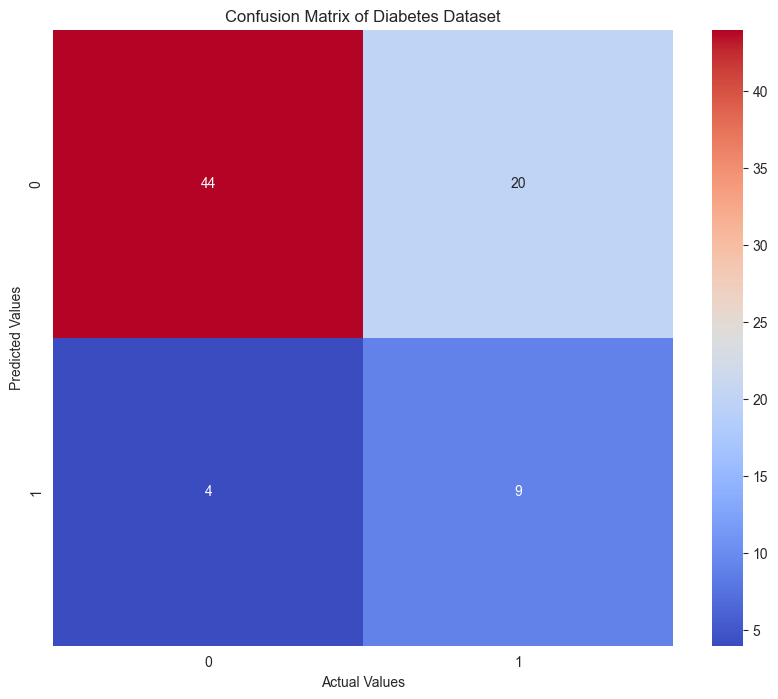

In [34]:
# Confusion matrix

def confusion_matrix(y_pred, y_test):
    """
    This function creates a confusion matrix
    :param y_pred: The predicted values
    :param y_test: The actual values
    :return: The confusion matrix
    """
    # We first create an empty matrix
    matrix = np.zeros((2, 2))
    # We now iterate over the values and fill the matrix
    for i in range(len(y_pred)):
        matrix[y_pred[i]][y_test[i]] += 1
    return matrix


# Convert y_pred and y_test to numpy arrays before passing them to the function
y_pred = np.array(y_pred)
y_test = np.array(y_test)

conf_matrix = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix with labels

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Confusion Matrix of Diabetes Dataset')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### Analysis of the confusion matrix
We can see that the model tends to predict more 0 than 1, this means that our model is more incline to predict that the patient does not have diabetes.

We got 20 false negatives, this means that the model predicted that the patient does not have diabetes, but the patient actually has diabetes.

In this small test set, with only about 77 patients, 20 false negatives is a really high number, as it is almost 26% of the total number of patients.

### Bootstrap analysis

In order to evaluate the reliability of the coefficients, we can perform a bootstrap analysis.

We will perform the following steps:

- Resample the data
- Fit the model to each resampled dataset
- Compute the coefficients for each resampled dataset
- Analyze the coefficients

This process will enable us to understand how the coefficients change when we resample the data.

This will give us an idea of how reliable the coefficients are, and if they are affected by the resampling of the data.

#### Bootstrapping process

In [35]:
# Takes about 5 minutes 20s to run

# Number of bootstrap samples
num_bootstrap_samples = 1000

# We will store the coefficients in this array
bootstrap_coefficients = np.zeros((num_bootstrap_samples, X_train.shape[1]))

# We now create the bootstrap samples

for i in range(num_bootstrap_samples):
    # We first create a bootstrap sample
    bootstrap_sample = train_data.sample(n=len(train_data), replace=True)

    # We now split the data into X and y
    X_train = bootstrap_sample.drop('Outcome', axis=1)
    y_train = bootstrap_sample['Outcome']

    # We now fit the model
    coefficients, bias = custom_logistic_regression_fit(X_train, y_train, learning_rate=0.01, iterations=1000)

    # We now store the coefficients
    bootstrap_coefficients[i, :] = coefficients

    if(i % 100 == 0 or i == num_bootstrap_samples - 1):
        print(f'Finished bootstrap sample {i}')

Finished bootstrap sample 0
Finished bootstrap sample 100
Finished bootstrap sample 200
Finished bootstrap sample 300
Finished bootstrap sample 400
Finished bootstrap sample 500
Finished bootstrap sample 600
Finished bootstrap sample 700
Finished bootstrap sample 800
Finished bootstrap sample 900
Finished bootstrap sample 999


#### Test of the bootstrapping results

Now we can analyze the results of the bootstrapping process.

We will test the reliability of the coefficients by computing the 95% confidence interval of the coefficients.

In [36]:
# We calculate the mean and standard deviation of the coefficients across all bootstrap samples
coef_means = bootstrap_coefficients.mean(axis=0)
coef_stds = bootstrap_coefficients.std(axis=0)

# Then we determine the 95% confidence intervals
confidence_intervals = [(mean - 1.96 * std, mean + 1.96 * std) for mean, std in zip(coef_means, coef_stds)]

# Check significance
significant_coefs = [not (ci[0] <= 0 <= ci[1]) for ci in confidence_intervals]

# Prepare the results in a DataFrame for better readability
coef_results = pd.DataFrame({
    'Coefficient': X_train.columns,
    'Mean': coef_means,
    '95% CI Lower': [ci[0] for ci in confidence_intervals],
    '95% CI Upper': [ci[1] for ci in confidence_intervals],
    'Significant at 5%': significant_coefs
})

# Print the results
print(coef_results)

     Coefficient      Mean  95% CI Lower  95% CI Upper  Significant at 5%
0    Pregnancies  1.771740      0.971306      2.572173               True
1        Glucose  0.291103     -0.280317      0.862523              False
2  BloodPressure -0.943102     -1.409072     -0.477131               True
3  SkinThickness  0.069834     -0.332017      0.471685              False
4        Insulin -0.055851     -0.467752      0.356051              False
5            BMI  0.010069     -0.792092      0.812231              False
6            Age -0.039631     -0.629785      0.550524              False


#### Statistical significance of the coefficients
From these results we can see that:

- Pregnancies
- BloodPressure

are statistically significant, as the confidence interval does not contain 0.

This means that these variables are reliable, they are not affected by the resampling of the data and they have an actual impact on the probability of having diabetes.

The other variables:

- Glucose
- SkinThickness
- Insulin
- BMI
- Age

are not statistically significant, as the confidence interval contains 0.

We can also see that the only coefficients with a significant absolute value are:

- Pregnancies
- Glucose
- BloodPressure

The other coefficients have a really low absolute value, all below 0.1.

### Model selection and evaluation

We can now perform a model selection, in order to select the best model.

In this selection we will reduce the number of coefficients implied in the model fitting, this way we may find a more accurate and simpler model.

We will perform the following steps:

- Fit the model with all the variables
- Fit the model with only the statistically significant variables
- Fit the model with only the variables with a significant correlation coefficient with respect to the target variable, from the exploratory analysis

Foreach of these models we will compute the accuracy on the test set and then analyze the confusion matrix of each model.

This way we can look at the ratio of false positive and false negative rates.

In [37]:
# Store the results

coefficients_arr = []
accuracy_arr = []
conf_matrix_arr = []
ratio_arr = []

#### Model with all the variables

We will fit again the model with all the coefficients:

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- Age

And then we will compute the accuracy, confusion matrix and the false positive and false negative rates on the test set.

In [38]:
# Model with all the variables

# We first split the data into X and y
X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']

# We now fit the model
coefficients, bias = custom_logistic_regression_fit(
    X_train,
    y_train,
    learning_rate=0.01,
    iterations=1000
)

# Accuracy function
acc = accuracy(y_pred, y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

# Ratio of the false positives
false_positives = conf_matrix[1][0]
true_negatives = conf_matrix[0][0]


# check for division by zero
if true_negatives == 0:
    false_positives_ratio = 0
else:
    false_positives_ratio = false_positives / true_negatives

# Ratio of the false negatives
false_negatives = conf_matrix[0][1]
true_positives = conf_matrix[1][1]

# check for division by zero
if true_positives == 0:
    false_negatives_ratio = 0
else:
    false_negatives_ratio = false_negatives / true_positives



# Save the results
coefficients_arr.append(coefficients)
accuracy_arr.append(acc)
conf_matrix_arr.append(conf_matrix)
ratio_arr.append((false_positives_ratio, false_negatives_ratio))

#### Model with only the statistically significant variables

We will fit again the model with only the statistically significant coefficients:

- Pregnancies
- BloodPressure

And then we will compute the accuracy, confusion matrix and the false positive and false negative rates on the test set.

In [39]:
# Model with only the significant variables (Pregnancies, Glucose)

# We first split the data into X and y
X_train = train_data[['Pregnancies', 'BloodPressure']]
y_train = train_data['Outcome']

# We now fit the model
coefficients, bias = custom_logistic_regression_fit(
    X_train,
    y_train,
    learning_rate=0.01,
    iterations=1000
)

# Accuracy function
y_pred = predict(X_test[['Pregnancies', 'BloodPressure']], coefficients, bias)
acc = accuracy(y_pred, y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

# Ratio of the false positives
false_positives = conf_matrix[1][0]
true_negatives = conf_matrix[0][0]

# check for division by zero
if true_negatives == 0:
    false_positives_ratio = 0
else:
    false_positives_ratio = false_positives / true_negatives

# Ratio of the false negatives
false_negatives = conf_matrix[0][1]
true_positives = conf_matrix[1][1]

# check for division by zero
if true_positives == 0:
    false_negatives_ratio = 0
else:
    false_negatives_ratio = false_negatives / true_positives

# Save the results
coefficients_arr.append(coefficients)
accuracy_arr.append(acc)
conf_matrix_arr.append(conf_matrix)
ratio_arr.append((false_positives_ratio, false_negatives_ratio))

#### Model with only the variables with a significant correlation coefficient with respect to the target variable, from the exploratory analysis

We will fit again the model with only the variables with a significant correlation coefficient with respect to the target variable, from the exploratory analysis:

- Glucose
- BMI
- Age

And then we will compute the accuracy, confusion matrix and the false positive and false negative rates on the test set.

In [40]:
# Model with only the significant variables (Glucose, BMI, Age)

# We first split the data into X and y
X_train = train_data[['Glucose', 'BMI', 'Age']]
y_train = train_data['Outcome']

# We now fit the model
coefficients, bias = custom_logistic_regression_fit(
    X_train,
    y_train,
    learning_rate=0.01,
    iterations=1000
)

# Accuracy function
y_pred = predict(X_test[['Glucose', 'BMI', 'Age']], coefficients, bias)
acc = accuracy(y_pred, y_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

# Ratio of the false positives
false_positives = conf_matrix[1][0]
true_negatives = conf_matrix[0][0]

# check for division by zero
if true_negatives == 0:
    false_positives_ratio = 0
else:
    false_positives_ratio = false_positives / true_negatives

# Ratio of the false negatives
false_negatives = conf_matrix[0][1]
true_positives = conf_matrix[1][1]

# check for division by zero
if true_positives == 0:
    false_negatives_ratio = 0
else:
    false_negatives_ratio = false_negatives / true_positives

# Save the results
coefficients_arr.append(coefficients)
accuracy_arr.append(acc)
conf_matrix_arr.append(conf_matrix)
ratio_arr.append((false_positives_ratio, false_negatives_ratio))

#### Analysis of the different models

We can now analyze the different models results.

We will look at the coefficients of the different variables, the accuracy and the confusion matrix of each model.

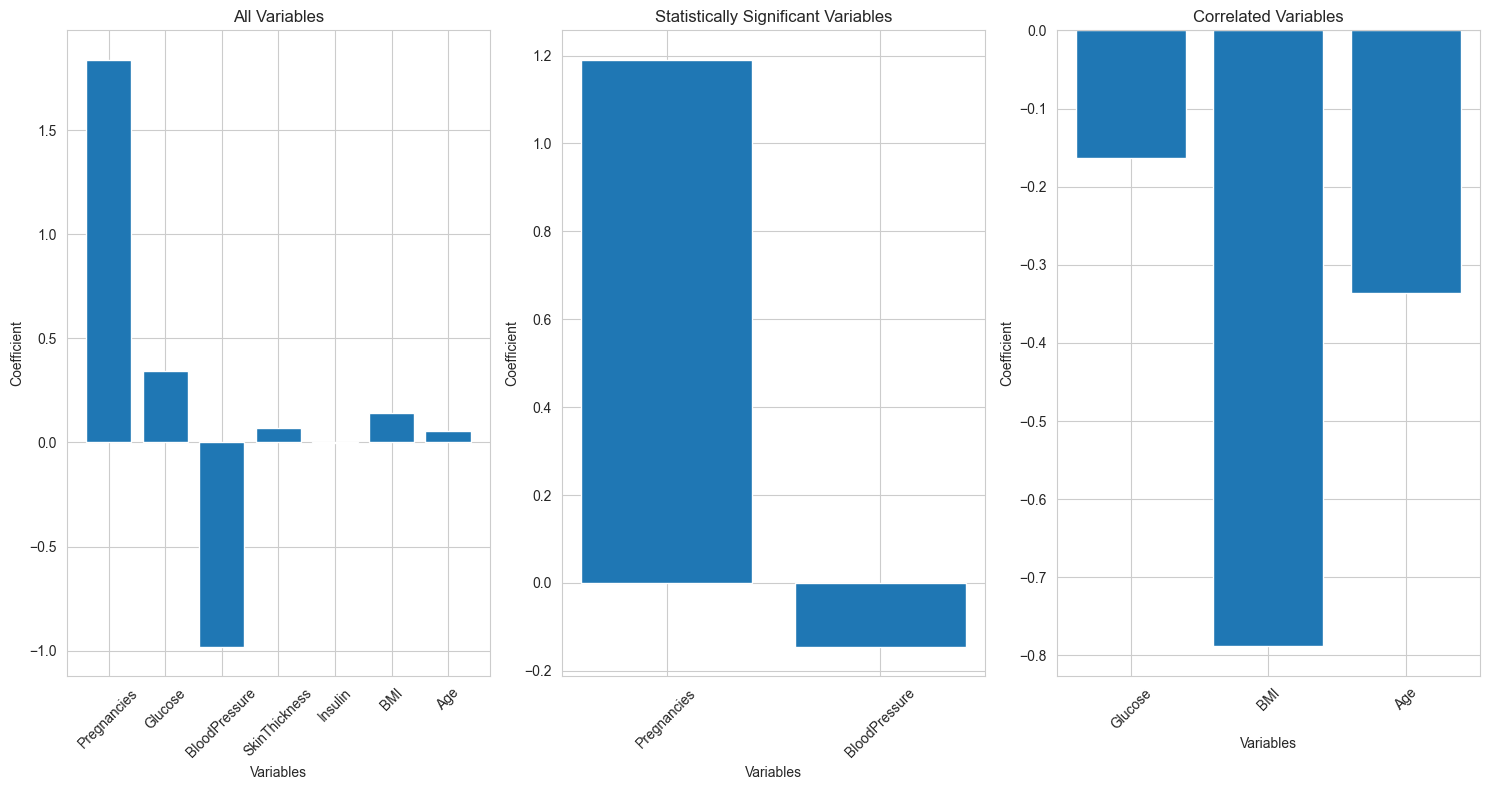

In [41]:
# Plot all the results in grouped plots

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Plot 1
X_train = train_data.drop('Outcome', axis=1)
axs[0].bar(X_train.columns, coefficients_arr[0])
axs[0].set_title('All Variables')
axs[0].set_xlabel('Variables')
axs[0].set_ylabel('Coefficient')
axs[0].set_xticks(X_train.columns)
axs[0].set_xticklabels(X_train.columns, rotation=45)

# Plot 2
X_train = train_data[['Pregnancies', 'BloodPressure']]
axs[1].bar(X_train.columns, coefficients_arr[1])
axs[1].set_title('Statistically Significant Variables')
axs[1].set_xlabel('Variables')
axs[1].set_ylabel('Coefficient')
axs[1].set_xticks(X_train.columns)
axs[1].set_xticklabels(X_train.columns, rotation=45)

# Plot 3
X_train = train_data[['Glucose', 'BMI', 'Age']]
axs[2].bar(X_train.columns, coefficients_arr[2])
axs[2].set_title('Correlated Variables')
axs[2].set_xlabel('Variables')
axs[2].set_ylabel('Coefficient')
axs[2].set_xticks(X_train.columns)
axs[2].set_xticklabels(X_train.columns, rotation=45)

plt.tight_layout()
plt.show()


We can see how when we reduce the number of variables, the ones that we keep increase by a lot their coefficients to compensate the loss of the other variables.

We can now look at the accuracy of the different models.

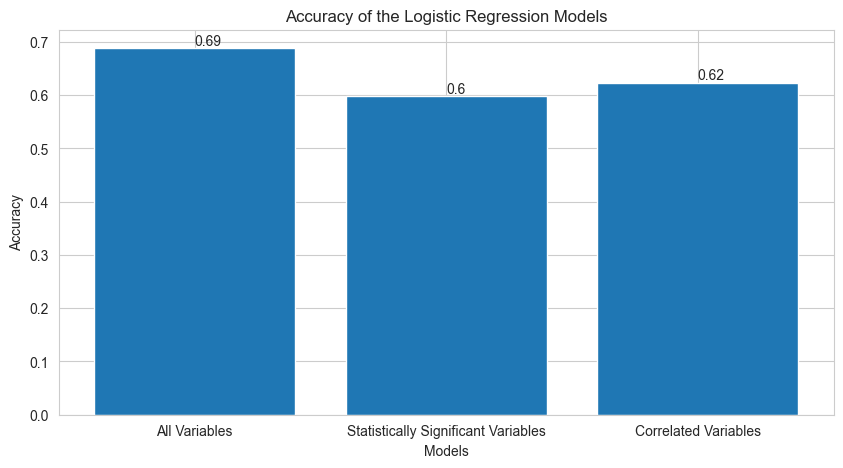

In [42]:
# Plot all the accuracies to compare them, just a bar plot with as the x the different models and as the y the accuracies

models_accuracy = [accuracy_arr[0], accuracy_arr[1], accuracy_arr[2]]
models_names = [
    'All Variables',
    'Statistically Significant Variables',
    'Correlated Variables'
]

plt.figure(figsize=(10, 5))
bars = plt.bar(models_names, models_accuracy)
plt.title('Accuracy of the Logistic Regression Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add the actual values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval,
             round(yval, 2), va='bottom')  # va: vertical alignment


plt.show()

We can see that the model with most accuracy is the one with all the variables, then the other two models have a lower and similar accuracy.

Let's look at the confusion matrix of the different models.

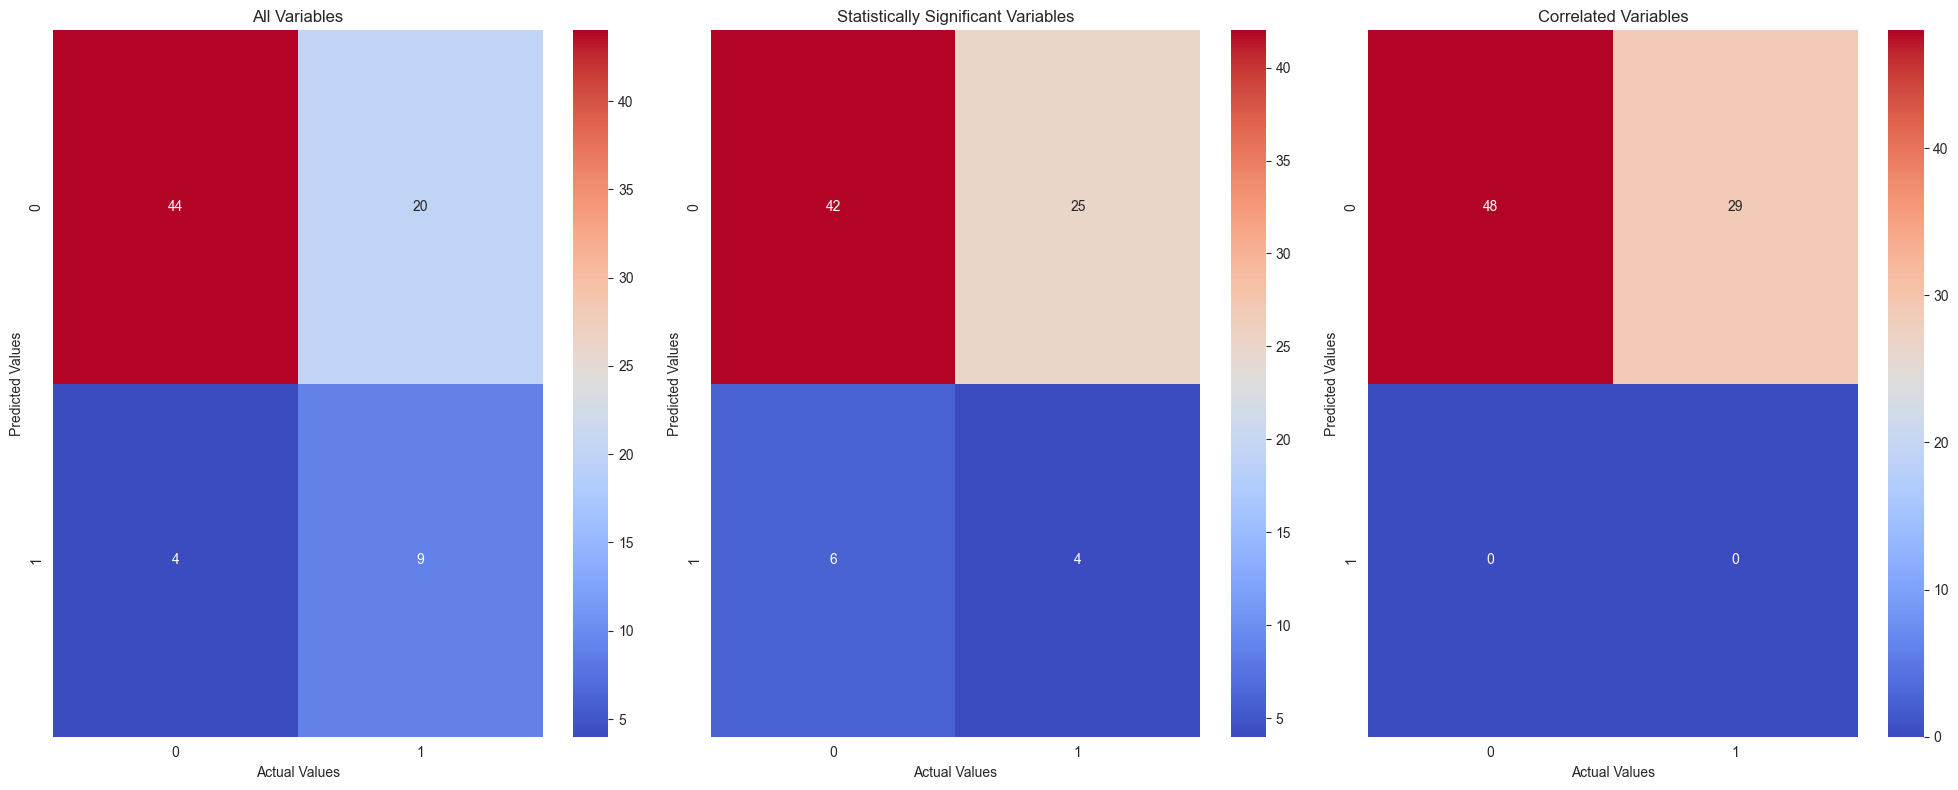

In [43]:
# Plot all the confusion matrices to compare them

fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.heatmap(conf_matrix_arr[0], annot=True, cmap='coolwarm', fmt='.0f', ax=axs[0])
axs[0].set_title('All Variables')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')

# Plot 2
sns.heatmap(conf_matrix_arr[1], annot=True, cmap='coolwarm', fmt='.0f', ax=axs[1])
axs[1].set_title('Statistically Significant Variables')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')

# Plot 3
sns.heatmap(conf_matrix_arr[2], annot=True, cmap='coolwarm', fmt='.0f', ax=axs[2])
axs[2].set_title('Correlated Variables')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [44]:
# Print the ratios of the false positives and false negatives

print(f'The ratio of the false positives for the model with all the variables is {ratio_arr[0][0]}')
print(f'The ratio of the false negatives for the model with all the variables is {ratio_arr[0][1]}')
print("")
print(f'The ratio of the false positives for the model with the statistically significant variables is {ratio_arr[1][0]}')
print(f'The ratio of the false negatives for the model with the statistically significant variables is {ratio_arr[1][1]}')
print("")
print(f'The ratio of the false positives for the model with the correlated variables is {ratio_arr[2][0]}')
print(f'The ratio of the false negatives for the model with the correlated variables is {ratio_arr[2][1]}')


The ratio of the false positives for the model with all the variables is 0.09090909090909091
The ratio of the false negatives for the model with all the variables is 2.2222222222222223

The ratio of the false positives for the model with the statistically significant variables is 0.14285714285714285
The ratio of the false negatives for the model with the statistically significant variables is 6.25

The ratio of the false positives for the model with the correlated variables is 0.0
The ratio of the false negatives for the model with the correlated variables is 0


## Conclusion

We can now answer the question that we asked at the beginning of the analysis:

`What are the key factors that contribute to the development of diabetes in women, and how do they affect the probability of developing the disease?`

It is not a simple question to answer, as we saw that the variables that we considered key factors in the exploratory analysis, were not the same variables that were key factors in the final model.

Thus, we will provide 2 different answers to this question.


### General answer

If we take in prospective a general approach to the problem, as the initial question was stated, we can see that the key factors are:

- Glucose concentration
- BMI (Body Mass Index)
- Age of the patient

Including only those varibles in the model does not decrease by much the accuracy of the model, but as a positive side, the data needed is more reliable and easier to collect.

The way they affect the probability of developing the disease is as they increase, the probability of developing the disease increases as well.

#### Glucose concentration

A higher glucose level increases the risk of diabetes. This aligns with physiological understanding, as diabetes is characterized by high blood sugar levels.

#### BMI (Body Mass Index)

Higher BMI, indicating overweight or obesity, is a well-known risk factor for type 2 diabetes. It affects the body's ability to use insulin effectively.

#### Age of the patient

Age is a factor in diabetes risk, with older individuals having a higher risk. This could be due to various reasons, including changes in insulin sensitivity and other hormonal changes that occur with age.


### Specific answer

If we instead focus on the data that we have, and look at the final model, we can see that the variables that impact more the probability of developing the disease are:

- Pregnancies
- BloodPressure
- Glucose

As the number of pregnancies and the glucose concentration increase, the probability of developing the disease increases as well.

As the diastolic blood pressure decreases, the probability of developing the disease increases

## Discussion

After all of these evaluations, we can conclude that the most accurate model is the one with all the variables.

This is counterintuitive, as in our exploratory analysis we saw that some variables were not reliable, or they were not correlated with the target variable.

This is still a plausible result, as the reasoning in the exploratory analysis was based on the correlation coefficient, which is not the only factor that affects the model.

In this case it appears that some of the variables that were considered non realiable in the exploratory analysis, where in fact key variables in the final model of this specific dataset.

It is important to specify "in this specific dataset", that is because the reasoning in the exploratory step is pretty generic and realistic, in contrast with the data that we have, which is considerable small, too specific and not representative of the general population.